https://www.youtube.com/playlist?list=PL2okA_2qDJ-m44KooOI7x8tu85wr4ez4f

In [20]:
from sklearn.datasets import load_digits

digits = load_digits()

data = digits.images[30:70].reshape((4,10,-1))


## Evaluate the generalization performance
[Video](https://www.youtube.com/watch?v=kLWvI9fSnKc&list=PL2okA_2qDJ-m44KooOI7x8tu85wr4ez4f&index=4&ab_channel=InriaLearningLab)

Distinguish memorisation from ability to learn the pattern in the data. We ensure that by doing a train-test split

In [ ]:
from sklearn.model_selection import train_test_split 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, shuffle= False)

# By doing shuffle = False, the last 20% of data will be used for split 

Train Test split is important as

* Score of the model depends on the train-test split
* representative of each element in the set 

A more systematic way of evaluating the generalization is through cross-validation. It will remove the perfomance based on chance. 

CV is repeating the split so that traing and testing are different for each evaluation set

The basic split in sklearn is KFold, in which we will iterate the different subsets that are being evaluated

In [16]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()

In [7]:
from sklearn.model_selection import KFold

cv = KFold(n_splits = 5, shuffle = False)

**How do we measure the accuracy**


In [21]:
from sklearn.model_selection import cross_val_score

# test_scores = cross_val_score(model, data, target, cv = cv)

For each of the above fold, we can calculate the accuracy. That means for each of the above fold, we will get the accuracy score and the variation in these scores gives us a hint on the uncertainty involved in the expected generalization performance. 

**Other technique for cross validation is `ShuffleSplit`. Number of splits doesn't determine the size of train and test**

In this process, we extract a set of values randomly and then put it back And again use it later. In this process, its important to remember that the more splits are made, the more repetition there will be of the cards. Although, it should not be a problem for big datasets

In [23]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 2)


So for the evaluation of the variablity of the generalization, the cross-validation step is very important

## Viz Sklearn Pipelines

[Video Link](https://www.youtube.com/watch?v=D0Nyumrs0G4&list=PL2okA_2qDJ-m44KooOI7x8tu85wr4ez4f&index=6&ab_channel=InriaLearningLab)

Pipelines are a very useful technique to combine multiple data-transformation process along with the classification/regression step and allow us to do it seamlessly. The pipeline once defined can itself be treated as a ML model 

* It helps avoid repetitive coding 
* Prevents data-leaking between training and testing set during validation 

In [25]:
import pandas as pd

In [27]:
url = 'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/house_prices.csv'

In [29]:
df = pd.read_csv(url, na_values = '?')

In [35]:
target_name = "SalePrice"

data, target = df.drop(columns = target_name), df[target_name]

# converting continous to discrete values
target = (target >200_000).astype('int')

In [36]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


**Cherry Pick the values**

In [39]:
numeric_features = ['LotArea', "FullBath", 'HalfBath']

categorical_features = ['Neighborhood', "HouseStyle"]

data = data[numeric_features + categorical_features]

In [40]:
data.head()

,LotArea,FullBath,HalfBath,Neighborhood,HouseStyle
0,8450,2,1,CollgCr,2Story
1,9600,2,0,Veenker,1Story
2,11250,2,1,CollgCr,2Story
3,9550,1,0,Crawfor,2Story
4,14260,2,1,NoRidge,2Story


In [42]:
data.isna().sum()

LotArea         0
FullBath        0
HalfBath        0
Neighborhood    0
HouseStyle      0
dtype: int64

### Creating a pipeline

In [41]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

**Define the transformation steps**

In [48]:
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median'))
    ,('scaler', StandardScaler())
])


# categorical data 
categorical_transformer = OneHotEncoder(handle_unknown = "ignore") # whenver there is a missing value. It will assign it as zero

**Using the `Column Transformer`**

In [50]:
from sklearn.compose import ColumnTransformer

preproccesor = ColumnTransformer(transformers = [
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

**Chain the transformation and Model**

In [53]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps = [
    ('preprocessor', preproccesor)
    ,('classifier', LogisticRegression())
])

**Visualize the pipeline**

In [55]:
from sklearn import set_config

set_config(display = 'diagram')

model 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'FullBath',
                                                   'HalfBath']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood',
                                                   'HouseStyle'])])),
                ('classifier', LogisticRegression())])

**Score the model**

In [57]:
from sklearn.model_selection import cross_validate


cv_results = cross_validate(model, data, target, cv = 5)

scores = cv_results['test_score']

print(scores.mean())

print(scores.std())

0.8589041095890411
0.017649450310582356


## Overfitting and underfitting 
[Video](https://www.youtube.com/watch?v=xErJGDwWqys&list=PL2okA_2qDJ-m44KooOI7x8tu85wr4ez4f&index=6&ab_channel=InriaLearningLab)

There is a tradeoff between the complexity of models and how it relates to generalizes

Complex Models

* Fit too well to the data seen and do not generalize

Simple Model 
* Fit poorly on the data seen, capture no noise, but also can't do a good job in generalizability

## Comparing Training and Test Errors

We will focus on changes arising from two aspects 

* Varying Complexity: validation curves --> Changing the parameters of the model 
* Varying Sample Size : learning curves --> changing the size of the data 

**Validation Curves**

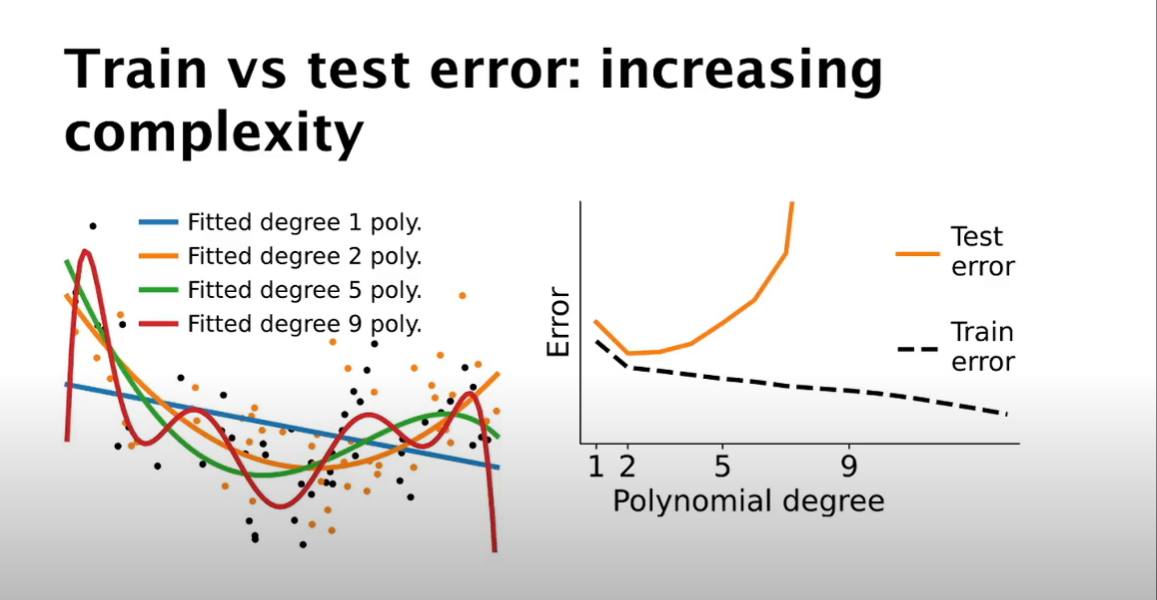

**Learning Curves**

The two error rates converge as the data size starts increasing. The model learns enough pattern so as to show similar behaviour on train and test data 

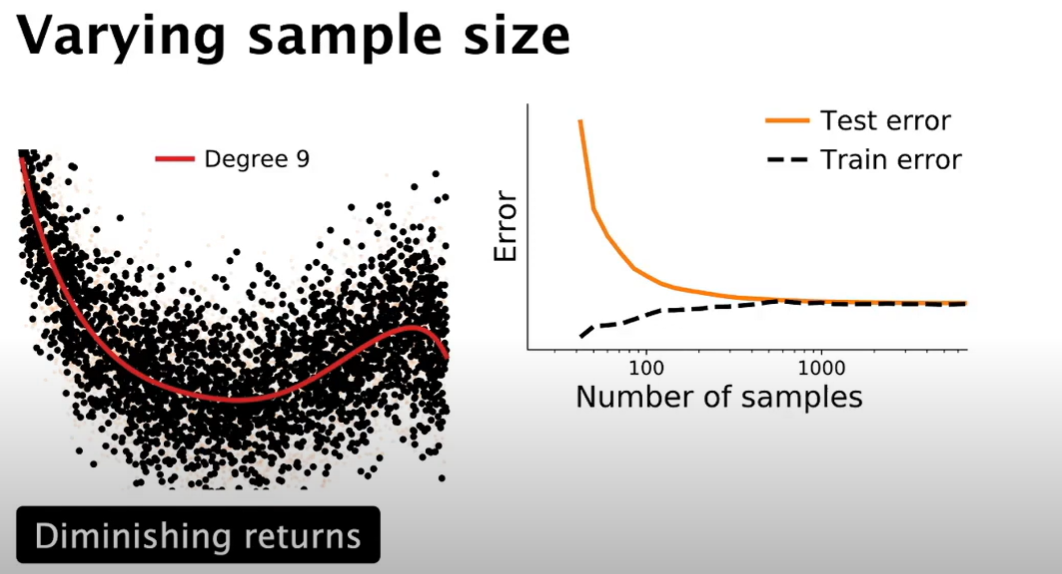

In the previous scenario, a 9 degree polynomial model was overfitting, however with the addition of the data, its performance improved. 

Also, note that the performance improvement will stop after a certain threshold as there is still noise in the data generating process and we won't be able to override that 

**Model Complexity**

The model complexity doesn't just depend on the model parameter, but rather on the model family as well. 

Choice of the family of model is known as "Inductive Bias"--> The shape of prediction function that one model class will favor over another. Hence, they have different notion of complexity 


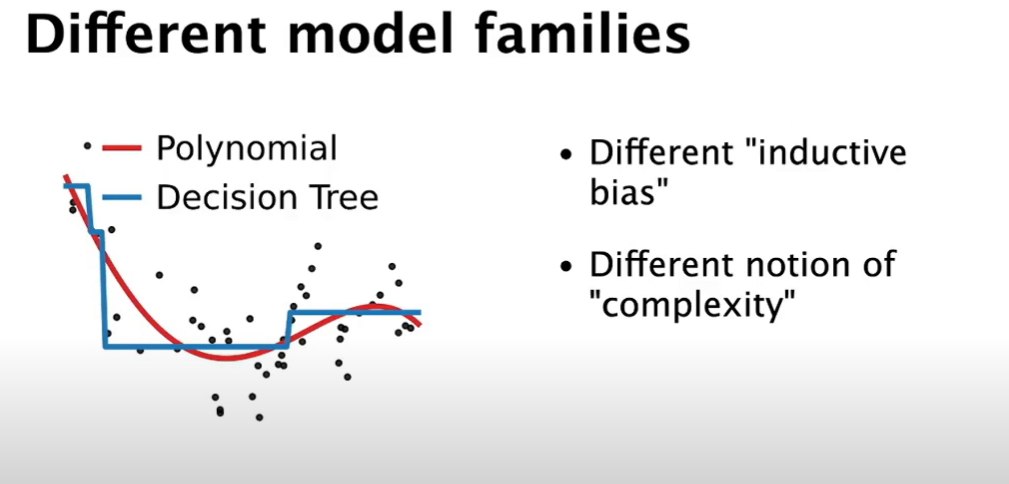

For every model, we can go through the regularization process to reduce the complexity of the model 

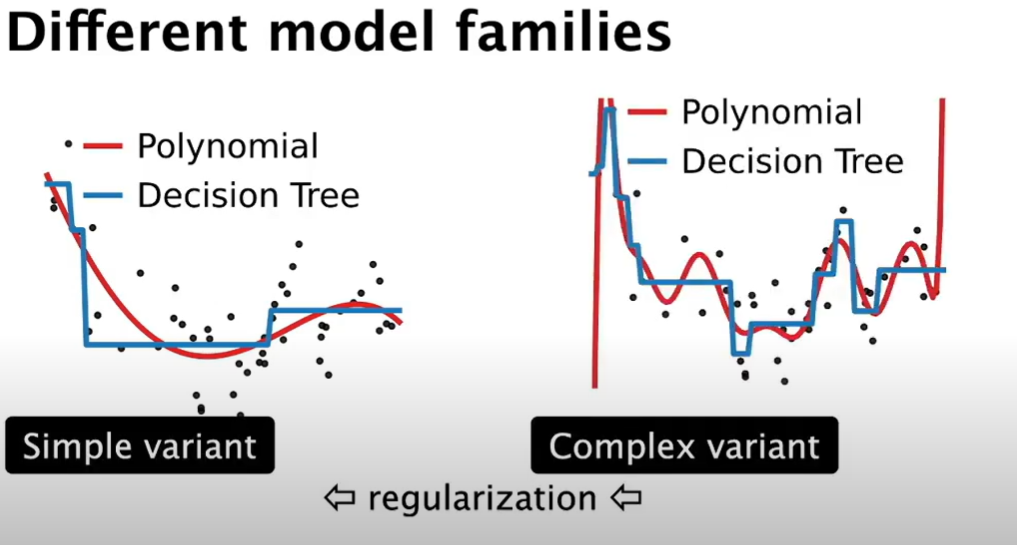